# Projeto Final

## Analisando Fluxo de Transito

Todos nós sabemos dos problemas relacionados ao transito de recife. Para identificar o volume de transito tomou como base os dados relacionados a foto sensores.

Dados de Equipament foto sensores: http://dados.recife.pe.gov.br/dataset/velocidade-das-vias-quantitativo-por-velocidade-media-2020/resource/94c283c0-cbfb-4540-9589-e62cd6ca039a
<p><b>Nome do Arquivo: </b>lombadas-fotossensores.csv</p>

esses são os dados de fluxo com base nos foto senssores: http://dados.recife.pe.gov.br/dataset/velocidade-das-vias-quantitativo-por-velocidade-media-2020/resource/7bf5f821-4ec4-47f4-b8ba-c1ab6a1cec3d
<p><b>Nome do Arquivo: </b>57439713-9d98-49b9-a985-e934debf2195.csv</p>

além de dados relacionados a Area urbana: http://dados.recife.pe.gov.br/dataset/area-urbana/resource/a642296d-1405-4918-87db-4ce88ba182f5?inner_span=True
<p><b>Nome do Arquivo: </b>trechoslogradouro.csv</p>


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
!git clone https://github.com/sauloemp/WebStreetPE.git

Cloning into 'WebStreetPE'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


## Trabalhando dados de Lombadas e foto senssores

In [13]:
dfLobadas = pd.read_csv("/content/WebStreetPE/lombadas-fotossensores.csv", sep = ";")
dfLobadas.head()

,equipamento,tipo,logradouro,velocidade_via,latitude,longitude
0,5941,Lombada,"AV. MAL. MASCARENHAS DE MORAES, EM FRENTE AERO...",60 km/h,-8.130970,-34.916161
1,5942,Lombada,"AV. MAL. MASCARENHAS DE MORAES, EM FRENTE AERO...",60 km/h,-8.130647,-34.915886
2,5943,Lombada,AV. BOA VIAGEM - TERCEIRO JARDIM,60 km/h,-8.107843,-34.888161
3,5944,Lombada,"DEFRONTE A PCA. GOV. PAULO GUERRA, CABANGA - S...",60 km/h,-8.080121,-34.892187
4,5945,Lombada,"APOS PONTE AGAMENON MAGALHAES, CABANGA - SENT....",60 km/h,-8.080820,-34.891159


## Trabalhando Dados de Fluxo

In [14]:
dfFluxo = pd.read_csv(r"/content/WebStreetPE/57439713-9d98-49b9-a985-e934debf2195.csv", sep = ",")
dfFluxo.head()

,_id,mes,equipamento,faixa,data,hora,minutos_intervalo,qtd_0a10km,qtd_11a20km,qtd_21a30km,qtd_31a40km,qtd_41a50km,qtd_51a60km,qtd_61a70km,qtd_71a80km,qtd_81a90km,qtd_91a100km,qtd_acimade100km
0,1,12,FS002REC,1,2020-12-01T00:00:00,1,0-15,1,1,0,0,0,0,0,0,0,0,0
1,2,12,FS002REC,1,2020-12-01T00:00:00,1,31-45,1,0,0,0,0,0,0,0,0,0,0
2,3,12,FS002REC,1,2020-12-01T00:00:00,1,46-59,0,2,1,0,0,0,0,0,0,0,0
3,4,12,FS002REC,1,2020-12-01T00:00:00,2,16-30,0,0,1,1,0,0,0,0,0,0,0
4,5,12,FS002REC,1,2020-12-01T00:00:00,2,46-59,2,1,0,0,0,0,0,0,0,0,0


In [15]:
dfFluxo['equipamento'].unique()

array(['FS002REC', 'FS003REC', 'FS004REC', 'FS006REC', 'FS009REC',
       'FS010REC', 'FS012REC', 'FS014REC', 'FS018REC', 'FS020REC',
       'FS021REC', 'FS022REC', 'FS023REC', 'FS024REC', 'FS025REC',
       'FS026REC', 'FS027REC', 'FS028REC', 'FS029REC', 'FS030REC',
       'FS033REC', 'FS037REC'], dtype=object)

In [16]:
dfFluxo.iloc[:,7:].sum(axis=1)

0          2
1          1
2          3
3          2
4          3
          ..
152253    12
152254     6
152255     1
152256     6
152257     3
Length: 152258, dtype: int64

In [17]:
dfFotossensoresBase = dfFluxo.iloc[:,:7]
dfFotossensoresSomatorio = dfFluxo.iloc[:,7:].sum(axis=1)
dfFotossensoresBase['Fluxo'] = dfFotossensoresSomatorio
dfFotossensoresBase.head()

,_id,mes,equipamento,faixa,data,hora,minutos_intervalo,Fluxo
0,1,12,FS002REC,1,2020-12-01T00:00:00,1,0-15,2
1,2,12,FS002REC,1,2020-12-01T00:00:00,1,31-45,1
2,3,12,FS002REC,1,2020-12-01T00:00:00,1,46-59,3
3,4,12,FS002REC,1,2020-12-01T00:00:00,2,16-30,2
4,5,12,FS002REC,1,2020-12-01T00:00:00,2,46-59,3


In [18]:
dfFotossensoresBase.drop(columns=['_id','faixa','mes', 'minutos_intervalo','hora','data'], inplace= True)

In [19]:
dfFotossensoresBase = dfFotossensoresBase.groupby(by=['equipamento']).sum('Fluxo').reset_index()

In [20]:
dfFotossensoresBase['codFotoSensor'] = dfFotossensoresBase['equipamento'].str.split("REC", expand=False)
dfFotossensoresBase['codFotoSensor'] = dfFotossensoresBase['equipamento'].str.split("REC", expand=True)

In [21]:
dfMergeSensorEquip = pd.merge(dfFotossensoresBase,dfLobadas, left_on='codFotoSensor',right_on='equipamento')

In [22]:
dfMergeSensorEquip.sort_values('Fluxo',inplace=True)

In [23]:
dfMergeSensorEquip

,equipamento_x,Fluxo,codFotoSensor,equipamento_y,tipo,logradouro,velocidade_via,latitude,longitude
8,FS018REC,30677,FS018,FS018,Fotossensor,"AV. DEZESSETE DE AGOSTO, SEMAFORO 370.",60 Km/h,-8.027762,-34.928001
1,FS003REC,43147,FS003,FS003,Fotossensor,"AV. MARQUES DE OLINDA, SEMAFORO 020.",30 Km/h,-8.063579,-34.873533
4,FS009REC,97590,FS009,FS009,Fotossensor,"AV. CDE. DA BOA VISTA, SEMAFORO 486.",40 Km/h,-8.061165,-34.883294
19,FS030REC,114229,FS030,FS030,Fotossensor,"AV. LIBERDADE, SEMAFORO 440",50 Km/h,-8.081111,-34.968354
13,FS024REC,137425,FS024,FS024,Fotossensor,"RUA GUILHERME PINTO, SEMAFORO 432.",40 Km/h,-8.052160,-34.902170
0,FS002REC,184834,FS002,FS002,Fotossensor,"RUA MADRE DE DEUS, SEMAFORO 020.",30 Km/h,-8.063400,-34.873669
14,FS025REC,201263,FS025,FS025,Fotossensor,"AV. DESEMBARGADOR JOSÉ NEVES, SEMAFORO 580",50 Km/h,-8.121513,-34.909343
18,FS029REC,232432,FS029,FS029,Fotossensor,RUA FALCAO DE LACERDA SEMAFORO 285,50 Km/h,-8.092039,-34.961494
20,FS033REC,271431,FS033,FS033,Fotossensor,"AV. DR. JOSE RUFINO, SEMAFORO 082.",60 Km/h,-8.084630,-34.928030
9,FS020REC,316038,FS020,FS020,Fotossensor,"AV. BEBERIBE, SEMAFORO 131.",60 Km/h,-8.027869,-34.892909


No handles with labels found to put in legend.


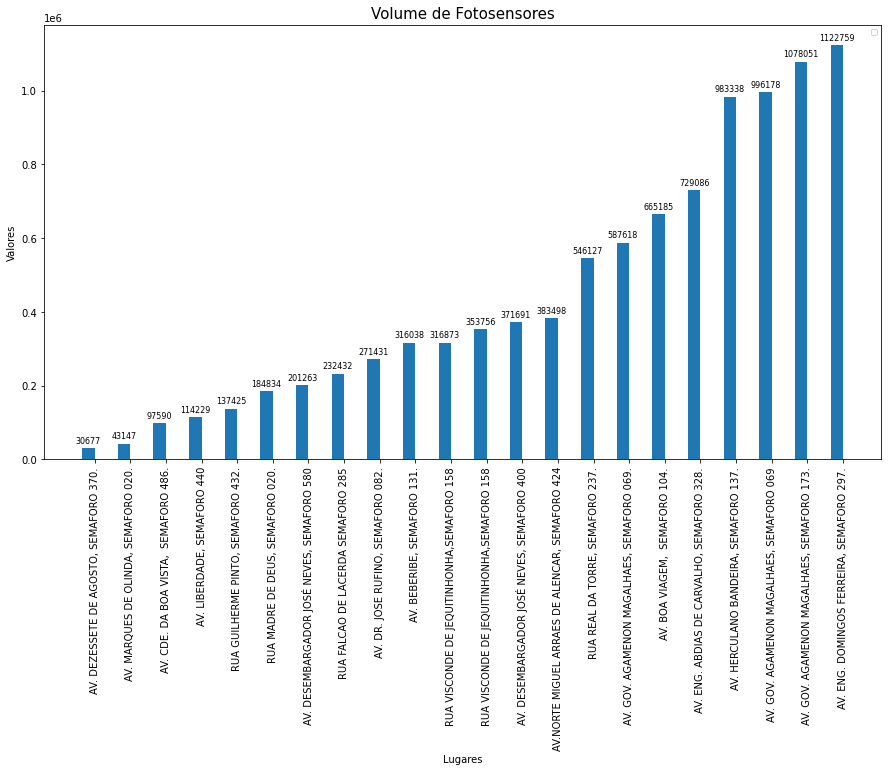

In [24]:
# Parâmetros iniciais

rotulos = dfMergeSensorEquip['logradouro']
x = np.arange(len(rotulos))
width = 0.35 # distanciamento das barras

fig, ax = plt.subplots(figsize=(15, 8))

# gerando dados para gráfico de barras

movie_bar = ax.bar(x - width/2, dfMergeSensorEquip['Fluxo'], width)

# definindo o nome dos eixos e Título

ax.set_xlabel('Lugares')
ax.set_ylabel('Valores')
ax.set_title('Volume de Fotosensores', fontsize = 15)
ax.set_xticks(x)
plt.xticks(rotation = 90) # Rotaciona os rótulos do eixo x em 90o.
ax.set_xticklabels(rotulos)

plt.rcParams.update({'font.size': 8})

# adicionando legenda

ax.legend()

def get_label(qtds):
    for i in qtds:
        altura = i.get_height()
        ax.annotate('{}'.format(altura,), xy=(i.get_x()+ i.get_width()/2, altura),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  
get_label(movie_bar)

## Trabalhando Dados de Trecho

In [25]:
dfTrecho = pd.read_csv(r"/content/WebStreetPE/trechoslogradouro.csv", sep = ";")
dfTrecho.head()

,codlogradouro,nome_logradouro_concatenado,nome_oficial_logradouro,nome_logradouro_resumido,cod_indica_pavimentacao,desc_indica_pavimentacao,indica_corredor_transporte,indica_perimetral,codbairro,nomeBairro
0,6939,RUA ARACATUBA,Rua Araçatuba,R. Aracatuba,S,Via Pavimentada,NaN,NaN,213,IPSEP
1,6947,RUA ARACE,Rua Arace,R. Arace,S,Via Pavimentada,NaN,NaN,566,NOVA DESCOBERTA
2,6955,RUA ARACOIABA,Rua Araçoiaba,R. Aracoiaba,X,Não definida,NaN,NaN,892,TEJIPIO
3,10502,RUA BEATRIZ,Rua Beatriz,R. Beatriz,S,Via Pavimentada,NaN,NaN,337,AGUA FRIA
4,10510,RUA BEBEDOURO,Rua Bebedouro,R. Bebedouro,S,Via Pavimentada,NaN,NaN,523,ALTO JOSE DO PINHO


In [26]:
dfTrecho[["nomeBairro",'nome_logradouro_resumido']]

,nomeBairro,nome_logradouro_resumido
0,IPSEP,R. Aracatuba
1,NOVA DESCOBERTA,R. Arace
2,TEJIPIO,R. Aracoiaba
3,AGUA FRIA,R. Beatriz
4,ALTO JOSE DO PINHO,R. Bebedouro
...,...,...
11916,IBURA,R. Lourival Bandeira de Melo
11917,IBURA,R. José Durval Carneiro
11918,IBURA,R. Dr Achilles Amorim Moura
11919,IBURA,R. Reinaldo Dorneles Camara


## Trabalhando com Grafos

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import networkx as nx

#Minhas funções
def grauMedio(G):
    i = 0
    vetorDeGraus = np.zeros(G.order())
    for no in G.degree():
        vetorDeGraus[i] = no[1]
        i += 1
    grauMedio = np.mean(vetorDeGraus)
    return grauMedio

def entropia(G):
    entropia = 0
    freq = nx.degree_histogram(G)
    for i in range(len(freq)):
        if freq[i] != 0: 
            entropia = entropia - freq[i]*np.log2(freq[i])
    return entropia

In [3]:
G = nx.Graph()

#G = nx.Graph([("R. Cláudio Brotherhood","Rua Áureo Xavier"),("R. Cláudio Brotherhood","R. Euríco de Souza Leão")])
G = nx.Graph([("R. Cláudio Brotherhood","Rua Áureo Xavier")])
G.edges()
#nx.draw_networkx(G)
#plt.show()

EdgeView([('R. Cláudio Brotherhood', 'Rua Áureo Xavier')])

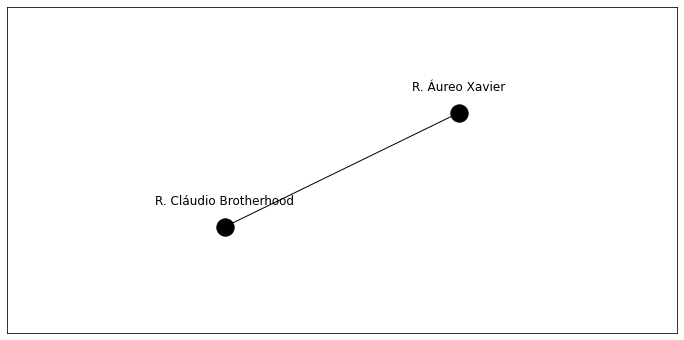

In [7]:
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}


#G = nx.Graph()

#G = nx.Graph([("R. Cláudio Brotherhood","Rua Áureo Xavier"),("R. Cláudio Brotherhood","R. Euríco de Souza Leão")])
G = nx.Graph([("R. Cláudio Brotherhood","R. Áureo Xavier"), ("R. Áureo Xavier", "R. Cláudio Brotherhood")])

fig, ax = plt.subplots(1,1,figsize=(12,6))
pos = nx.spring_layout(G)
pos_nodes = nudge(pos, 0, 0.1)

#nx.draw_networkx(G,with_labels=True, pos = pos_nodes, node_size=350, node_color='Black' ,ax=ax[0])

nx.draw_networkx(G, pos=pos, with_labels=False, ax=ax, node_color='Black')
nx.draw_networkx_labels(G, pos=pos_nodes, ax=ax)

ax.margins(0.8, 0.8) 
plt.show()

In [34]:
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}


def plotIndicadoresGrafos(G):
  print('\n\n'+'\033[1m' + 'Indicadores' + '\033[0m')
  print('Densidade: \t\t', nx.density(G))
  print("Coef. Clusterização: \t", nx.average_clustering(G))
  print("Grau médio: \t\t", grauMedio(G))
  print("Entropia: \t\t", entropia(G))
  print("Assortatividade: \t", nx.degree_assortativity_coefficient(G))

  print('\n\033[1m' + 'Graficos' + '\033[0m')
  #Autovalores
  autovalores = nx.laplacian_spectrum(G)
  plt.bar(np.arange(G.order()), autovalores)
  plt.title("Autovalores")
  plt.show()

  #Disrtibuição
  freq = nx.degree_histogram(G)
  plt.title("Distribuição")
  plt.bar(np.arange(len(freq)), freq)
  plt.show()

  #Grafos
    
  fig, ax = plt.subplots(1,1,figsize=(12,6))
  pos = nx.spring_layout(G)
  pos_nodes = nudge(pos, 0, 0.1)

  nx.draw_networkx(G, pos=pos, with_labels=False, ax=ax, node_color='Black')
  nx.draw_networkx_labels(G, pos=pos_nodes, ax=ax)
  ax.margins(0.8, 0.8)

  plt.title("Grafo")

  plt.show()



Indicadores
Densidade: 		 1.0
Coef. Clusterização: 	 0.0
Grau médio: 		 1.0
Entropia: 		 -2.0
Assortatividade: 	 nan

Graficos


/usr/local/lib/python3.7/dist-packages/networkx/algorithms/assortativity/correlation.py:282: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


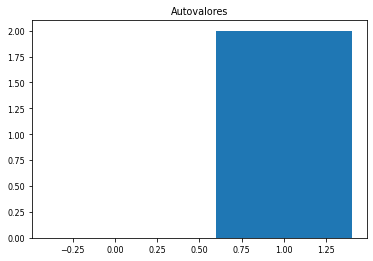

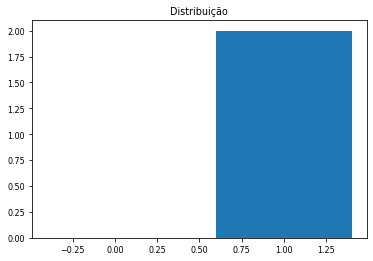

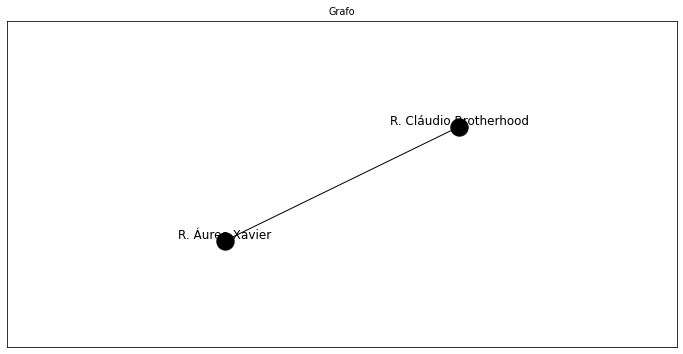

In [37]:
plotIndicadoresGrafos(G)